In [ ]:
!pip install pandas

KNN 알고리즘

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)
print(trainData[:5]) # 0~99 사이의 정수들 중에 x, y 축 값으로 25개 뽑기 (5개만 보기)

response = np.random.randint(0, 2, (25, 1)).astype(np.float32)
print(response[:5]) # 0또는 1 중에 25개 뽑기 (5개만 보기)

NewData = np.random.randint(0, 100, (1, 2)).astype(np.float32) # 0~99 사이의 정수들 중에 x, y 축 값으로 1개 뽑기
print(NewData)

[[22. 20.]
 [38.  1.]
 [91. 82.]
 [11. 86.]
 [43. 33.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[69. 13.]]


In [28]:
red = trainData[response.ravel() == 0]
print(red) # reponse 값이 0인 trainData 인덱스 값을 red로 지정

[[14. 11.]
 [90. 49.]
 [48. 24.]
 [37. 63.]
 [47. 78.]
 [32. 29.]
 [78.  8.]
 [96. 60.]
 [ 6.  7.]
 [ 8. 51.]
 [60. 67.]
 [82. 37.]]


In [29]:
blue = trainData[response.ravel() == 1]
print(blue) # reponse 값이 1인 trainData 인덱스 값을 blue로 지정

[[22. 20.]
 [38.  1.]
 [91. 82.]
 [11. 86.]
 [43. 33.]
 [ 6. 71.]
 [91. 17.]
 [59. 76.]
 [49. 74.]
 [69. 80.]
 [34. 52.]
 [79. 12.]
 [90. 48.]]


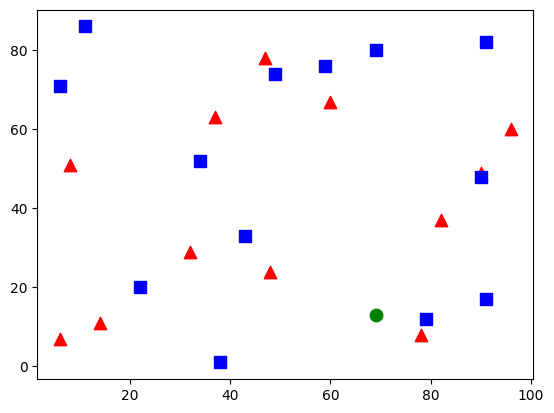

In [31]:
plt.scatter(red[:, 0], red[:, 1], 80, "r", "^") # 80은 마커의 크기
plt.scatter(blue[:, 0], blue[:, 1], 80, "b", "s")

plt.scatter(NewData[:, 0], NewData[:, 1], 80, "g", "o")

In [32]:
knn = cv2.ml.KNearest.create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)
# ROW_SAMPLE: 데이터가 행 단위로 구성된다는 것을 나타내는 플래그
# response: 각 훈련 샘플에 대한 응답(라벨)을 나타내는 배열

True

In [35]:
ret, result, neighbors, distance =knn.findNearest(NewData, 3)
print(knn.findNearest(NewData, 3))
# ret = 1.0
# result = array([[1.]], dtype=float32)
# neighbors = array([[1., 0., 1.]]dtype=float32)
# distance = array([[101., 106., 500.]], dtype=float32))

(1.0, array([[1.]], dtype=float32), array([[1., 0., 1.]], dtype=float32), array([[101., 106., 500.]], dtype=float32))


In [37]:
print("ret :", ret)
print("result :", result)
print("neighbors :", neighbors)
print("distance :", distance)

ret : 1.0
result : [[1.]]
neighbors : [[1. 0. 1.]]
distance : [[101. 106. 500.]]
